<a href="https://colab.research.google.com/github/vasanthi200221/classroompractice/blob/main/Decision_Tree_assignment_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment (fraud)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [ ]:
fraud=pd.read_csv("Fraud_check.csv")

In [ ]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
fraud['Risky_1'] = fraud["Taxable.Income"].map(lambda x: 0 if x <= 30000 else 1)


In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky_1
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1
596,YES,Divorced,69967,55369,2,YES,1
597,NO,Divorced,47334,154058,0,YES,1
598,YES,Married,98592,180083,17,NO,1


In [ ]:
fraud.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky_1
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
5,NO,Divorced,33329,116382,0,NO,1
6,NO,Divorced,83357,80890,8,YES,1
7,YES,Single,62774,131253,3,YES,1
8,NO,Single,83519,102481,12,YES,1
9,YES,Divorced,98152,155482,4,YES,1


In [ ]:
fraud['Undergrad']=fraud['Undergrad'].astype('category')
fraud['Marital.Status']=fraud['Marital.Status'].astype('category')
fraud['Urban']=fraud['Urban'].astype('category')
fraud.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income        int64
City.Population       int64
Work.Experience       int64
Urban              category
Risky_1               int64
dtype: object

In [ ]:
fraud.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky_1
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
5,NO,Divorced,33329,116382,0,NO,1
6,NO,Divorced,83357,80890,8,YES,1
7,YES,Single,62774,131253,3,YES,1
8,NO,Single,83519,102481,12,YES,1
9,YES,Divorced,98152,155482,4,YES,1


In [ ]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status'])

In [ ]:
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])

In [ ]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky_1
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [ ]:
x=fraud.iloc[:,0:6]
y=fraud["Risky_1"]

In [ ]:
pd.set_option("display.max_rows", None)
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
5,0,0,33329,116382,0,0
6,0,0,83357,80890,8,1
7,1,2,62774,131253,3,1
8,0,2,83519,102481,12,1
9,1,0,98152,155482,4,1


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     0
17     1
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     1
30     1
31     1
32     1
33     1
34     0
35     1
36     0
37     1
38     0
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     1
53     0
54     1
55     0
56     1
57     1
58     0
59     1
60     1
61     0
62     1
63     1
64     1
65     1
66     1
67     1
68     0
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     0
80     1
81     1
82     1
83     1
84     1
85     0
86     1
87     0
88     1
89     0
90     1
91     1
92     1
93     0
94     0
95     1
96     0
97     1
98     0
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    0
107    1
108    1
109    1
110    0
1

In [ ]:
y.value_counts()

1    476
0    124
Name: Risky_1, dtype: int64

In [ ]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Risky_1']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

# Decision Tree model

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

[Text(0.5, 0.75, 'x[2] <= 30041.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 382\nvalue = [0, 382]')]

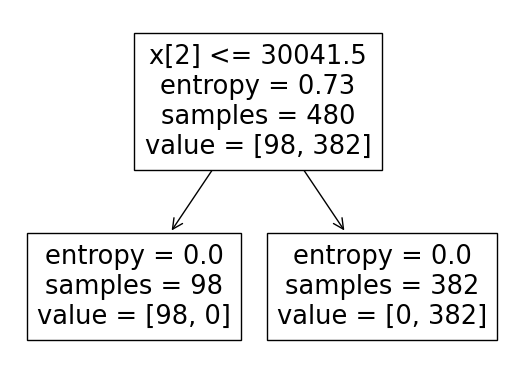

In [ ]:
tree.plot_tree(model)

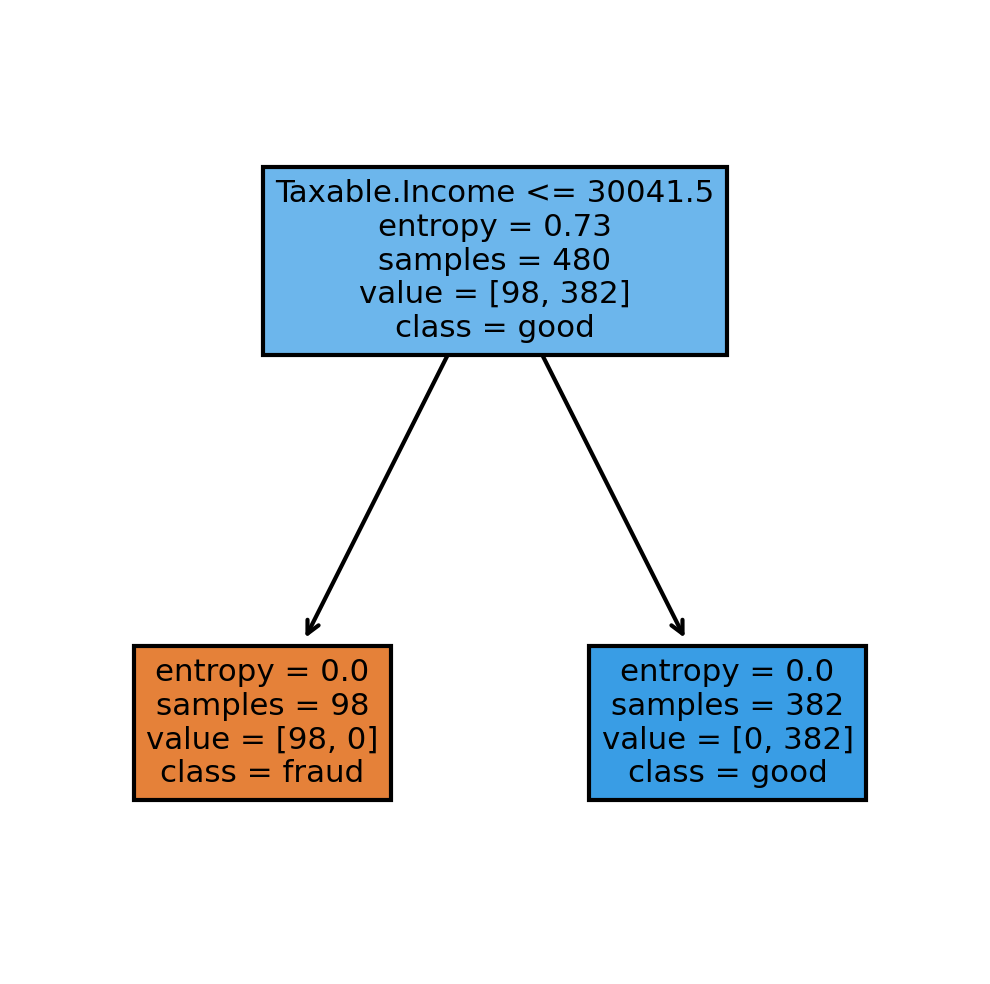

In [ ]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['fraud','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
y_train.value_counts()

1    382
0     98
Name: Risky_1, dtype: int64

In [ ]:
text = tree.export_text(model,max_depth=6)
print(text)

|--- feature_2 <= 30041.50
|   |--- class: 0
|--- feature_2 >  30041.50
|   |--- class: 1



In [ ]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

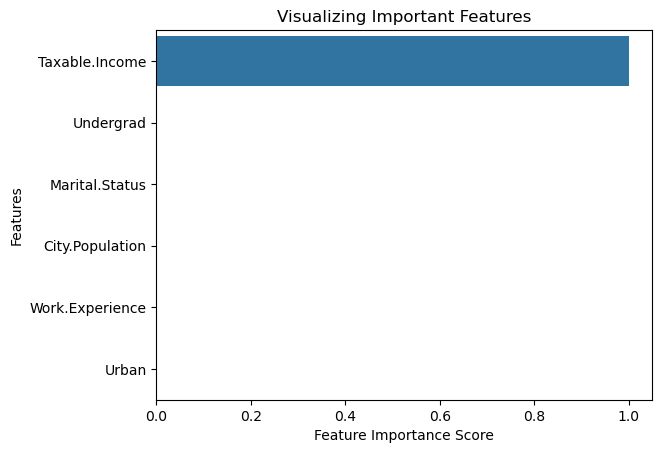

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    94
0    26
dtype: int64

In [ ]:
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
Risky_1,,
0,26,0
1,0,94


In [ ]:
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [ ]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

[Text(0.5, 0.75, 'x[2] <= 30041.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 382\nvalue = [0, 382]')]

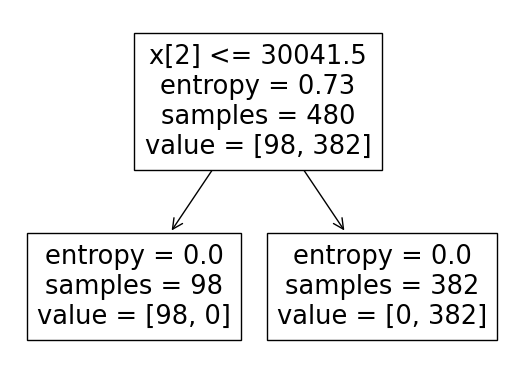

In [ ]:
tree.plot_tree(model)

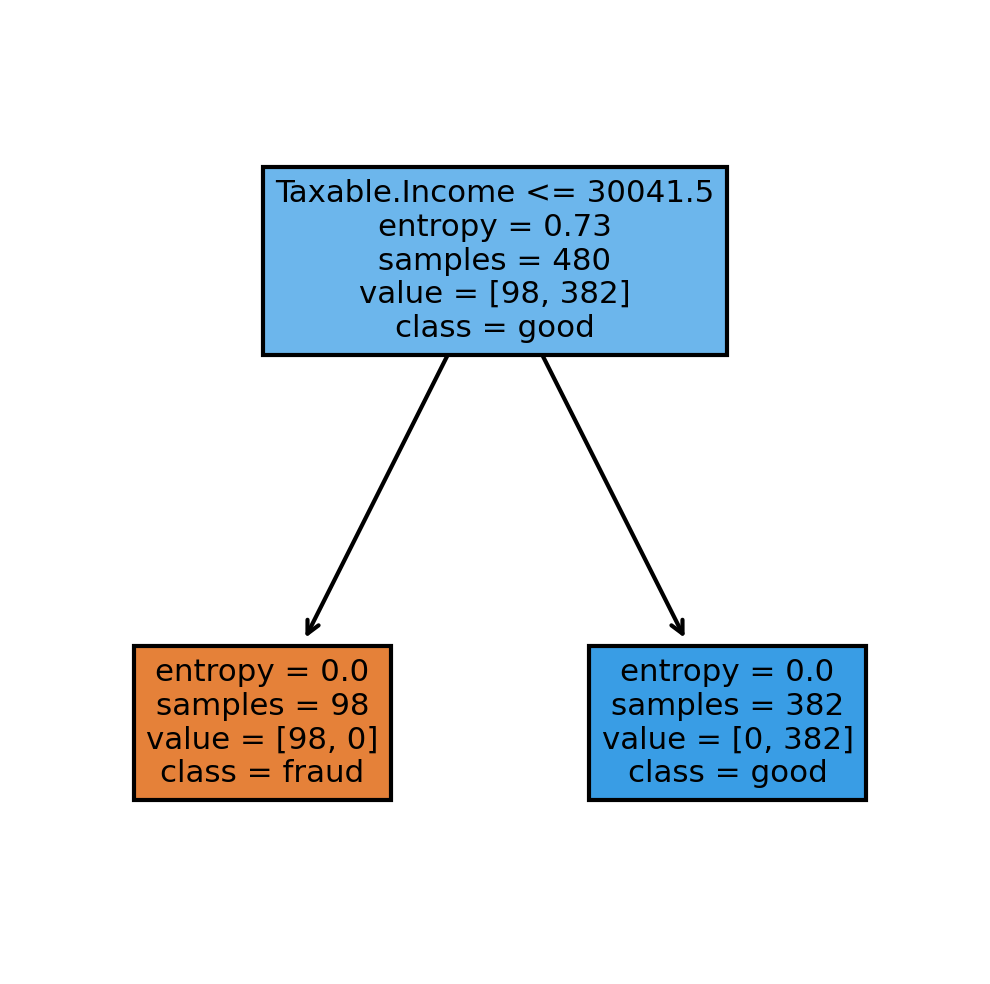

In [ ]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['fraud','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = fraud.values
X = array[:,0:6]
y = array[:,6]

In [ ]:
X

array([[     0,      2,  68833,  50047,     10,      1],
       [     1,      0,  33700, 134075,     18,      1],
       [     0,      1,  36925, 160205,     30,      1],
       ...,
       [     0,      0,  47334, 154058,      0,      1],
       [     1,      1,  98592, 180083,     17,      0],
       [     0,      0,  96519, 158137,     16,      0]], dtype=int64)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
#Find the testing accuracy
model.score(X_test,y_test)

1.0

In [ ]:
model.score(X_train, y_train)

1.0

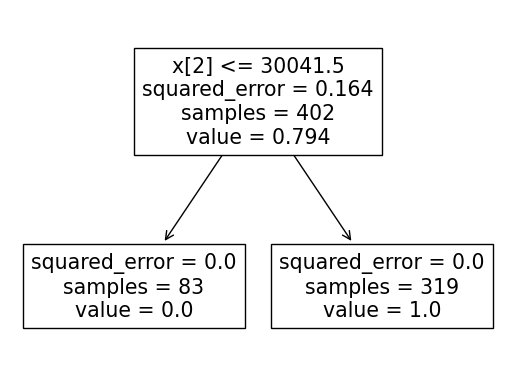

In [ ]:
tree.plot_tree(model);

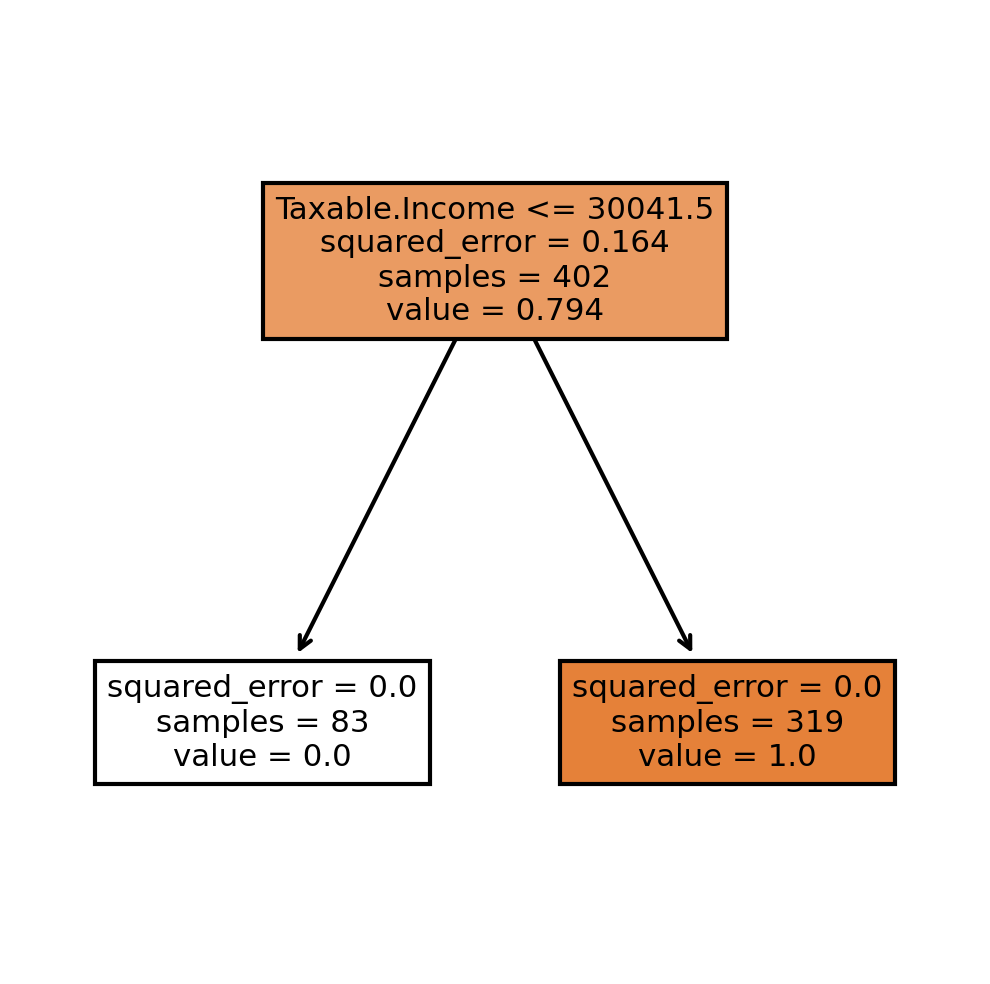

In [ ]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['fraud','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);